## Exploratory Data Analysis

In [1]:
# import necessory packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


In [2]:
# import cleaned data
data = pd.read_csv('cleaned_data.csv')

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

###### `Observations`
- 1. Unnecessory column `Unnamed:0`
- 2. Dataset have 17 coumns and 1016 rows.`Price` is dependent variable.
- 3. columns `score`,`processor gen`,`type of core`,`ram type`,`storage capacity`,`ppi`,`warranty` have missing values.
- 4. datatypes of `Ram` is 'object'
- 5. numerical columns are not normally distributed.
- 6. dataset have outliers( columns = price,no of threads,ram,storage capacity,screen size,Warranty)
- 7. numerical columns have strong co relation.
- 8. intel,AMD,Apple are the top 3 processor brand
- 9. i5,ryzen,i3 are the top 3 processor type
- 10. 12the,11th,5th,10th,3rd are top processor generations
- 11. quad,dual,octa,hexa, 10th core are the top five cores.
- 12. ram and no of threads have multicolinearity

In [4]:
data.head(1)

,Unnamed: 0,brand_names,model name,price,score,processor brand,processor type,processor gen,type of core,no of threads,Ram,ram type,storage type,storage capacity,screen size,screen resolution,OS,Warranty
0,0,infinix,Infinix Zero Book Ultra,84490,65.0,Intel,i9,12.0,14.0,32.0,32,LPDDR5,SSD,1024.0,NaN,NaN,Windows 11,NaN


In [5]:
# checking shape of dataset
data.shape

(1016, 18)

In [6]:
# dropping column 'Unnmaed:0'
data.drop('Unnamed: 0',inplace=True,axis=1)

In [7]:
# checking missing values.
data.isnull().sum()

brand_names            0
model name             0
price                  0
score                420
processor brand        0
processor type         4
processor gen        101
type of core          23
no of threads          0
Ram                    0
ram type               1
storage type           0
storage capacity       8
screen size           34
screen resolution     34
OS                     0
Warranty              86
dtype: int64

In [8]:
# checking duplicates rows
data.duplicated().sum()

0

In [9]:
# checking data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand_names        1016 non-null   object 
 1   model name         1016 non-null   object 
 2   price              1016 non-null   int64  
 3   score              596 non-null    float64
 4   processor brand    1016 non-null   object 
 5   processor type     1012 non-null   object 
 6   processor gen      915 non-null    float64
 7   type of core       993 non-null    float64
 8   no of threads      1016 non-null   float64
 9   Ram                1016 non-null   object 
 10  ram type           1015 non-null   object 
 11  storage type       1016 non-null   object 
 12  storage capacity   1008 non-null   float64
 13  screen size        982 non-null    float64
 14  screen resolution  982 non-null    object 
 15  OS                 1016 non-null   object 
 16  Warranty           930 n

In [10]:
# changing data type of 'Ram'
data['Ram']= data['Ram'].astype('int')

In [11]:
# ram type value correction
data['ram type'] = data['ram type'].str.lower()

In [12]:
# Splitting screen resolution.
screen_res_x = data['screen resolution'].str.split('x').str.get(0).astype(float)
screen_res_y = data['screen resolution'].str.split('x').str.get(1).astype(float)

In [13]:
# adding two new column to dataset
data.insert(14,'X_res',screen_res_x)
data.insert(15,'Y_res',screen_res_y)

In [14]:
# adding new column ppi
ppi = (((data['X_res']**2)+(data['Y_res']**2))**0.5)/data['screen size']

In [15]:
data.insert(16,'ppi',ppi)

In [16]:
# drop columns screen size,X_res,Y_res
data.drop(columns = ['screen size','X_res','Y_res','screen resolution'],inplace=True,axis=1)

### Uni variate analysis

In [17]:
# splitting dataset into numerical and categorical dataframes.
num_col = data.select_dtypes(include = np.number)
cat_col = data.select_dtypes(exclude = np.number)

In [18]:
# dividing the data into categorical and numerical column
numerical_features = [col for col in data.columns if data[col].dtypes != 'O']
categorical_features = [col for col in data.columns if data[col].dtypes == 'O']

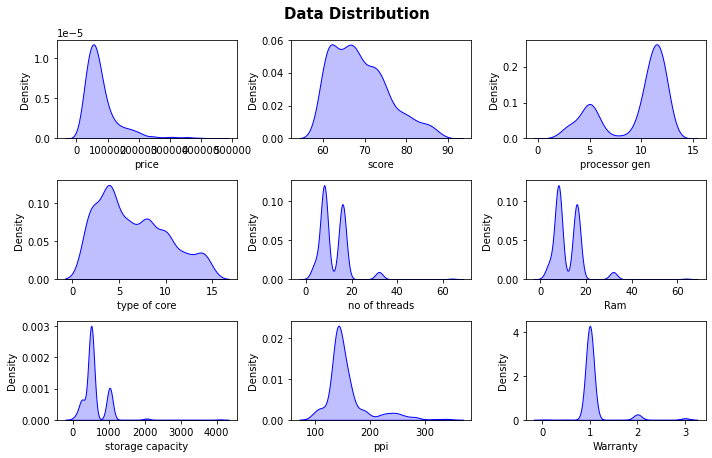

In [19]:
# checking data distribution of numerical columns
plt.figure(figsize=(10, 10))
plt.suptitle('Data Distribution', fontsize=15, fontweight='bold', alpha=1.)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=data[numerical_features[i]],shade=True, color='b')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

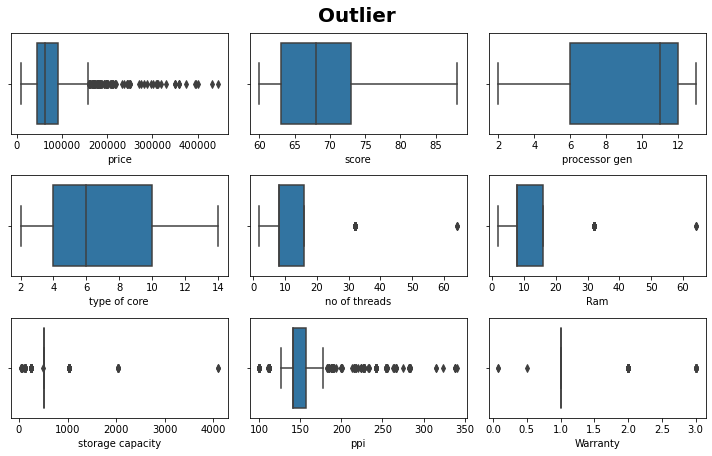

In [20]:
plt.figure(figsize=(10,10))
plt.suptitle('Outlier', fontsize=20, fontweight='bold', alpha=1.)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x=data[numerical_features[i]])
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

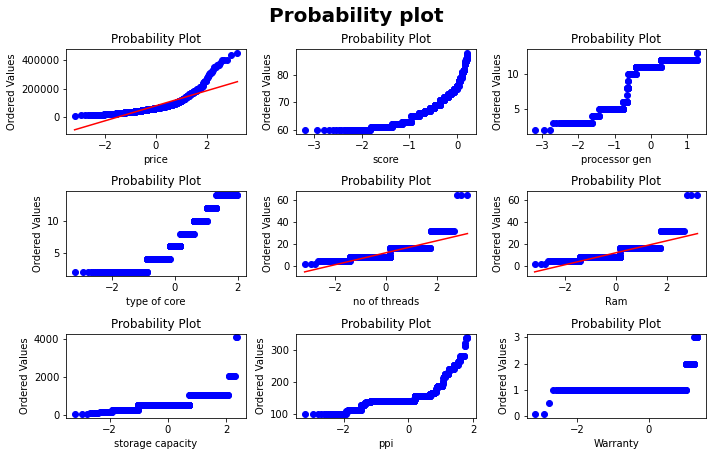

In [21]:
plt.figure(figsize=(10,10))
plt.suptitle('Probability plot', fontsize=20, fontweight='bold', alpha=1.)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    scipy.stats.probplot(x=data[numerical_features[i]], dist="norm", plot=plt)
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

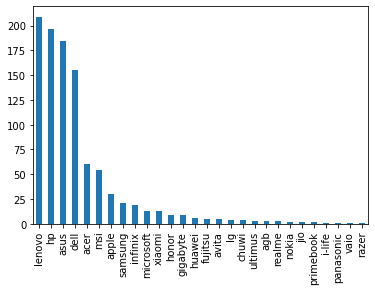

In [22]:
# brand names
data['brand_names'].value_counts().plot(kind='bar')
plt.show()

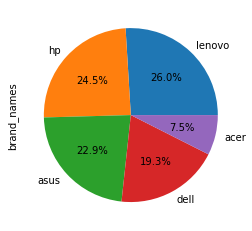

In [23]:
# top 5 brands
data['brand_names'].value_counts().head(5).plot(kind = 'pie',autopct = '%0.1f%%')
plt.show()

In [24]:
features_list = ['brand_names', 'processor brand','processor type','processor gen','type of core','no of threads','Ram','ram type','storage type','storage capacity','OS','Warranty']

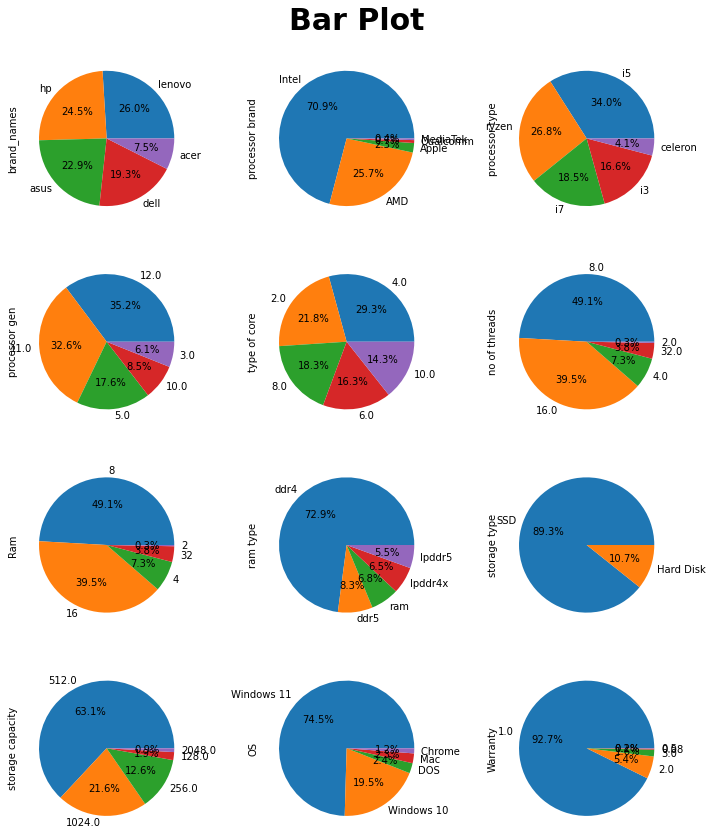

In [25]:
plt.figure(figsize=(10,15))
plt.suptitle('Bar Plot', fontsize=30, fontweight='bold', alpha=1.)

for i in range(0, len(features_list)):
    plt.subplot(5, 3, i+1)
    data[features_list[i]].value_counts().head(5).plot(kind='pie',autopct='%0.1f%%')
    plt.tight_layout()

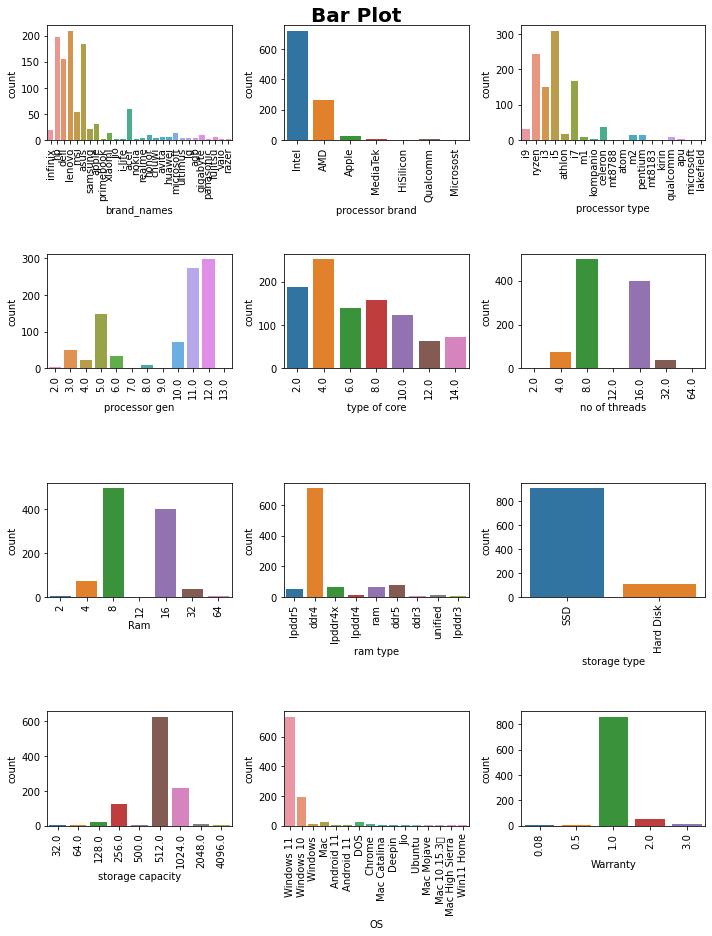

In [26]:
plt.figure(figsize=(10,15))
plt.suptitle('Bar Plot', fontsize=20, fontweight='bold', alpha=1.)

for i in range(0, len(features_list)):
    plt.subplot(5, 3, i+1)
    sns.countplot(x=data[features_list[i]],data = data)
    plt.xlabel(features_list[i])
    plt.xticks(rotation='vertical')
    plt.tight_layout()

In [27]:
# selecting top brands
data['brand_names']=data['brand_names'].replace(['honor','gigabyte','huawei','fujitsu','avita','lg','chuwi','ultimus','agb','realme','nokia','jio','primebook','i-life','panasonic','vaio','razer','samsung','infinix','xiaomi','microsoft'],'others')

In [28]:
data['brand_names'].value_counts()

lenovo    209
hp        197
asus      184
dell      155
others    127
acer       60
msi        54
apple      30
Name: brand_names, dtype: int64

In [29]:
# selecting top processor types
data['processor type']=data['processor type'].replace(['qualcomm','kompanio','apu','microsoft','mt8788','kirin','mt8183','mt8183','atom','lakefield'],'others')

In [30]:
data['processor type'].value_counts()

i5         309
ryzen      243
i7         168
i3         151
celeron     37
i9          32
athlon      17
others      17
pentium     15
m2          14
m1           9
Name: processor type, dtype: int64

In [31]:
# selecting top ram type
data['OS'] = data['OS'].str.strip().replace(['Ubuntu','Android 11','Mac Catalina','Mac 10.15.3','Mac High Sierra','Deepin','Jio','Mac Mojave','Mac Mojave','Win11 Home'],'others')

In [32]:
data['OS'].value_counts()

Windows 11    735
Windows 10    192
DOS            24
Mac            23
others         19
Chrome         12
Windows        11
Name: OS, dtype: int64

In [33]:
data['processor brand'] = data['processor brand'].replace(['Qualcomm','MediaTek','HiSilicon','Microsost'],'others')

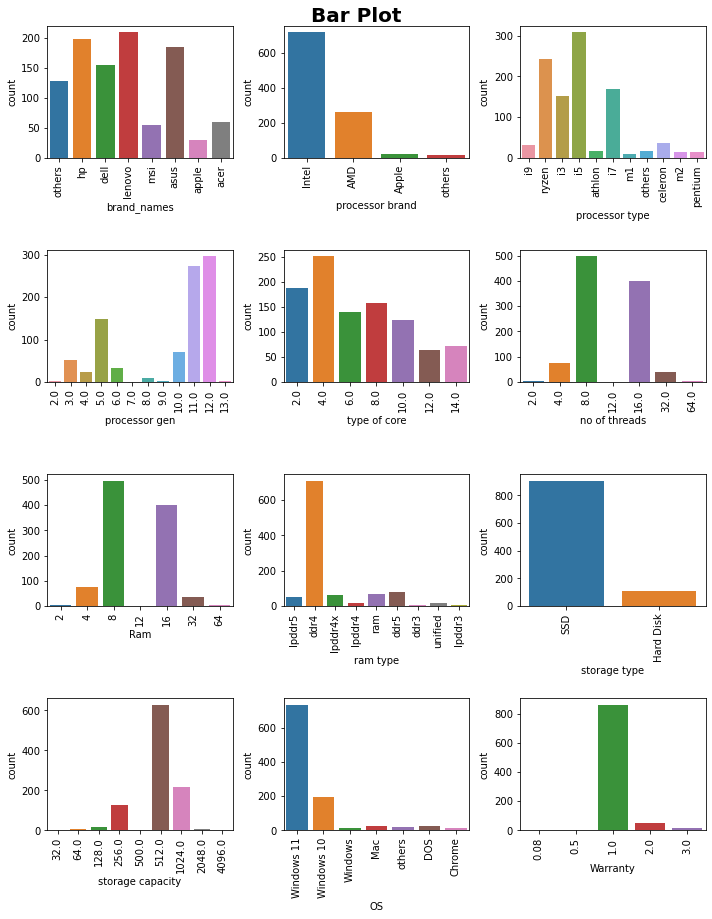

In [34]:
plt.figure(figsize=(10,15))
plt.suptitle('Bar Plot', fontsize=20, fontweight='bold', alpha=1.)

for i in range(0, len(features_list)):
    plt.subplot(5, 3, i+1)
    sns.countplot(x=data[features_list[i]],data = data)
    plt.xlabel(features_list[i])
    plt.xticks(rotation='vertical')
    plt.tight_layout()

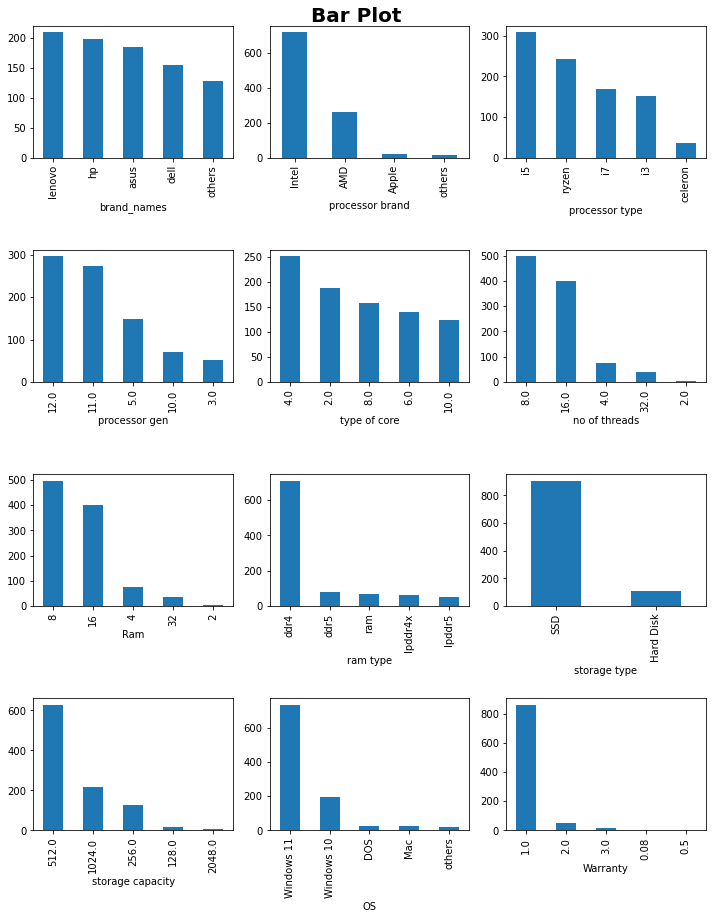

In [35]:
# top 5 in each features
plt.figure(figsize=(10,15))
plt.suptitle('Bar Plot', fontsize=20, fontweight='bold', alpha=1.)

for i in range(0, len(features_list)):
    plt.subplot(5, 3, i+1)
    data[features_list[i]].value_counts().head(5).plot(kind='bar')
    plt.xlabel(features_list[i])
    plt.xticks(rotation='vertical')
    plt.tight_layout()

### Bi variate analysis

In [36]:
# checking correlation of numerical features
data.corr()['price']

price               1.000000
score               0.589907
processor gen       0.210815
type of core        0.576648
no of threads       0.759501
Ram                 0.759501
storage capacity    0.568271
ppi                 0.515289
Warranty            0.196520
Name: price, dtype: float64

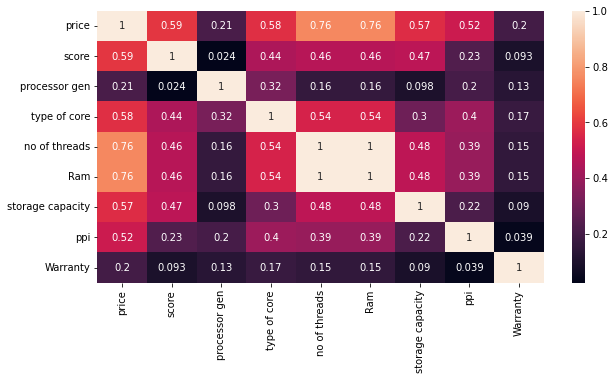

In [37]:
plt.figure(figsize = (10,5))
sns.heatmap(data.corr(), annot=True)
plt.yticks()
plt.show()

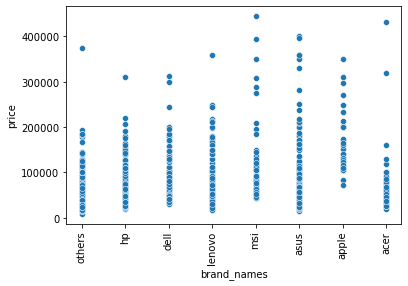

In [38]:
# price vs brand names
sns.scatterplot(data=data, x='brand_names',y='price')
plt.xticks(rotation='vertical')
plt.show()

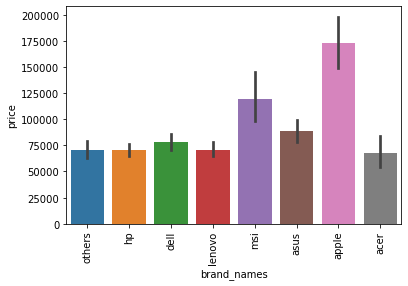

In [39]:
sns.barplot(data=data, x='brand_names', y='price',estimator=np.mean)
plt.xticks(rotation='vertical')
plt.show()

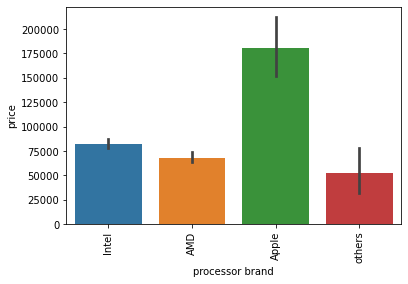

In [40]:
#processor brand vs price
sns.barplot(data=data, x='processor brand', y='price')
plt.xticks(rotation='vertical')
plt.show()

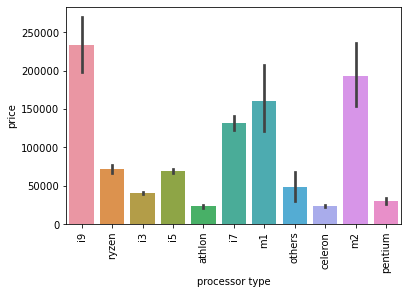

In [41]:
# processor type vs price
sns.barplot(data=data, x='processor type', y='price')
plt.xticks(rotation='vertical')
plt.show()

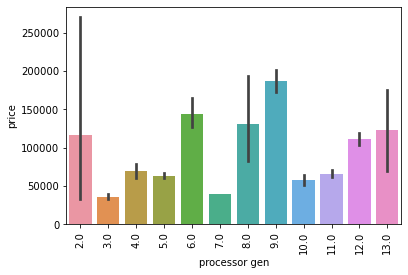

In [43]:
# processor gen vs price
sns.barplot(data=data, x='processor gen', y='price')
plt.xticks(rotation='vertical')
plt.show()

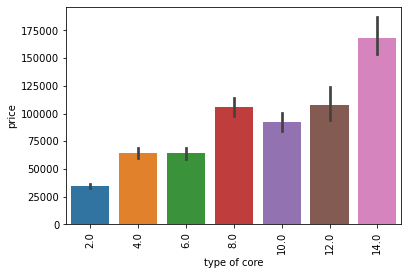

In [44]:
# type of core vs price
sns.barplot(data=data, x='type of core', y='price')
plt.xticks(rotation='vertical')
plt.show()

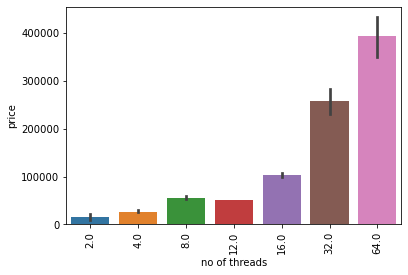

In [45]:
# no of threads vs price
sns.barplot(data=data, x='no of threads', y='price')
plt.xticks(rotation='vertical')
plt.show()

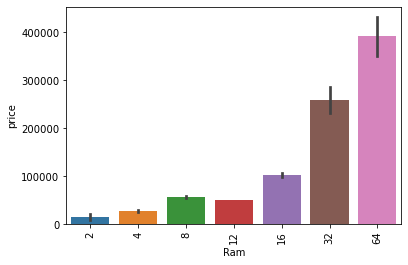

In [46]:
# Ram vs price
sns.barplot(data=data, x='Ram', y='price')
plt.xticks(rotation='vertical')
plt.show()

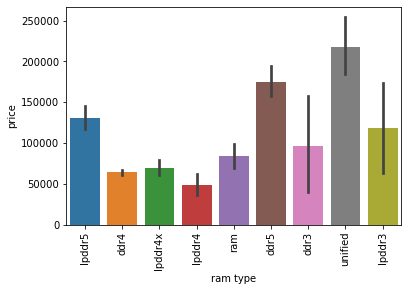

In [47]:
# ram type vs price
sns.barplot(data=data, x='ram type', y='price')
plt.xticks(rotation='vertical')
plt.show()

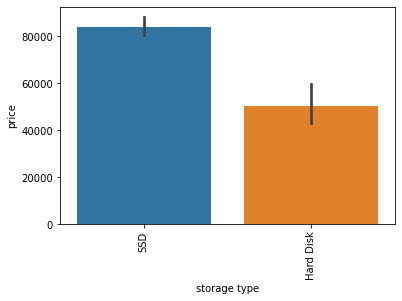

In [48]:
# storage type vs price
sns.barplot(data=data, x='storage type', y='price')
plt.xticks(rotation='vertical')
plt.show()

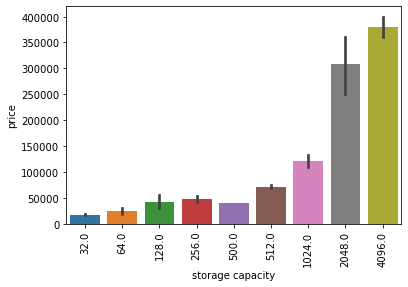

In [49]:
# storage capacity vs price
sns.barplot(data=data, x='storage capacity', y='price')
plt.xticks(rotation='vertical')
plt.show()

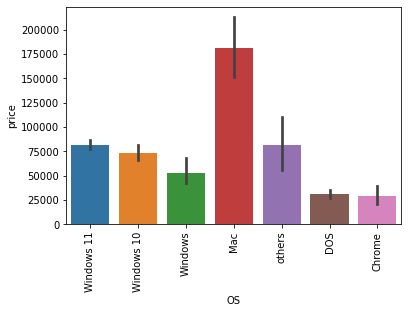

In [52]:
# OS vs price
sns.barplot(data=data, x='OS', y='price')
plt.xticks(rotation='vertical')
plt.show()

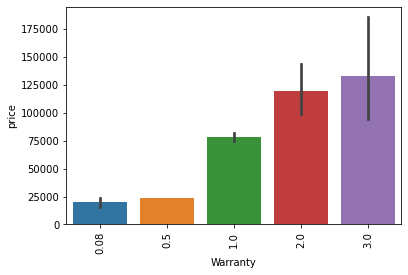

In [53]:
# Warranty vs price
sns.barplot(data=data, x='Warranty', y='price')
plt.xticks(rotation='vertical')
plt.show()

#### Missing value Imputation,Scaling & Encoding

In [58]:
data.isnull().sum()

brand_names           0
model name            0
price                 0
score               420
processor brand       0
processor type        4
processor gen       101
type of core         23
no of threads         0
Ram                   0
ram type              1
storage type          0
storage capacity      8
ppi                  34
OS                    0
Warranty             86
dtype: int64